# Reproduce Manuscript Figures

Simplified model of quenching in diatoms, based on the ETC model for Arabidopsis, as described in Matuszynska et al. 2016 [1].

[1] Matuszyńska, A., Heidari, S., Jahns, P., Ebenhöh, O., 2016. A mathematical model of non-photochemical quenching to study short-term light memory in plants. Biochimica et Biophysica Acta (BBA) - Bioenergetics 1857, 1860–1869. https://doi.org/10.1016/j.bbabio.2016.09.003)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from modelbase.ode import Simulator

from model import model_diatom as m
import functions
import get_NPQ

## Model description
![scheme](scheme.png "Scheme of the model")


Scheme of the photosynthetic electron transport chain with complexes and reactions included into the computational model of NPQ in diatoms highlighted in colour. Figure created with BioRender.com

In [2]:
# check the stoichiometric matrix
m.get_stoichiometric_df()

vATPactivity  vATPcons  vATPsynthase  vKEA3  vPQox  vXdeepox  vXepox  vps2
A            0.0      -1.0      1.000000   0.00   0.00       0.0     0.0  0.00
Dd           0.0       0.0      0.000000   0.00   0.00      -1.0     1.0  0.00
E            1.0       0.0      0.000000   0.00   0.00       0.0     0.0  0.00
H            0.0       0.0     -0.046667  -0.01   0.04       0.0     0.0  0.02
P            0.0       0.0      0.000000   0.00  -1.00       0.0     0.0  1.00

In [3]:
# initial conditions
y0 =  {"P": 5., "H": 5.56305280e-04, "E": 0.5, "A": 10., "Dd": .99}

In [4]:
# calculate Fv/Fm
Q = m.get_full_concentration_dict(y0)['Q']
fvfm = m.get_parameter('kP')/(m.get_parameter('kF') + m.get_parameter('kP') + m.get_parameter('kH')*Q)
print(Q, fvfm)

[0.005] [0.64864865]


In [11]:
# prepare my dictionaries for labelling
colpal = {'Mutant 1': 'limegreen',
          'WT': 'red',
          'Overexpressor 1': 'blue',
}

leak_var = {'Mutant 1': 0.91,# 0.865, #0.9
            'WT': .7, 
            'Overexpressor 1': 0.65,
           }

## Reproduce Figure 3 from the Manuscript
NPQ under moderate light for wt and KEA3 mutants

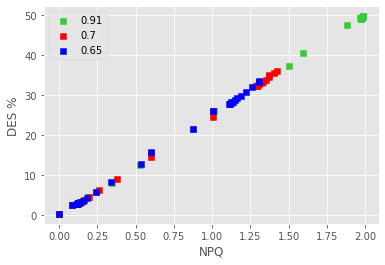

In [12]:
fig1, axNPQ = plt.subplots()
fig3, axdt2 = plt.subplots()


data = dict()
  
for leak in leak_var.keys():

    m.update_parameters({'kkea': leak_var[leak],
                         'ketc': 2.})


    s = Simulator(m)
    s.initialise(y0)

    # dark adaptation: making sure that the initial conditions are representing
    # healthy state of the diatom with oxidised PQ pool and no active quencher
    s.update_parameters({'pfd': 0.,
                         'kkea': leak_var[leak]})
    s.simulate(1000, steps=3000, **{"atol":1e-8})
    y0d = s.get_results_array()[-1]


    PAM1 = functions.changingLight(m, y0d, PFD=200., dim =0.)
    F = PAM1.get_variable('Fluo')
    Fm, NPQ, tm, Fo, to = get_NPQ.get_NPQ(PAM1.get_variable('Fluo'), PAM1.get_time(), PAM1.get_variable('L'), 5000)

    axNPQ.plot(tm/60., NPQ,'s-', label=str(round(leak_var[leak]/(1-leak_var[leak]),2)), color=colpal[leak])
    axNPQ.set_xlabel('Time [s]')
    axNPQ.set_ylabel('NPQ [normalized]')       

    axdt2.scatter(NPQ, [PAM1.get_variable('Dt')[i]*100 for i in [list(PAM1.get_time()).index(x) for x in tm]], marker='s', 
                        label=str(leak_var[leak]), color=colpal[leak])
    axdt2.set_xlabel('NPQ')
    axdt2.set_ylabel('DES %')

    data[leak] = {'time': tm, 'NPQ': NPQ}

    # export raw data as a csv file
    pd.DataFrame(data[leak]).to_csv("200_file"+str(leak)+".csv")

axNPQ.legend(title='$k_{KEA3}$')
axdt2.legend()

plt.show()

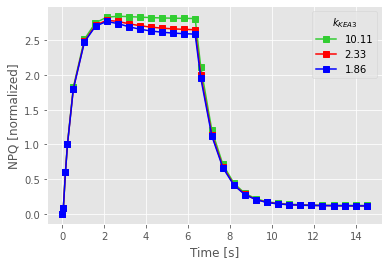

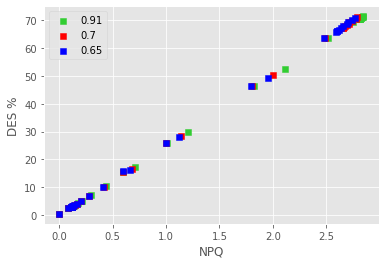

In [13]:
fig1, axNPQ = plt.subplots()
fig3, axdt2 = plt.subplots()


data = dict()
  
for leak in leak_var.keys():

    m.update_parameters({'kkea': leak_var[leak],
                         'ketc': 2.})


    s = Simulator(m)
    s.initialise(y0)

    # dark adaptation: making sure that the initial conditions are representing
    # healthy state of the diatom with oxidised PQ pool and no active quencher
    s.update_parameters({'pfd': 0.,
                         'kkea': leak_var[leak]})
    s.simulate(1000, steps=3000, **{"atol":1e-8})
    y0d = s.get_results_array()[-1]


    PAM1 = functions.changingLight(m, y0d, PFD=600., dim =0.)
    F = PAM1.get_variable('Fluo')
    Fm, NPQ, tm, Fo, to = get_NPQ.get_NPQ(PAM1.get_variable('Fluo'), PAM1.get_time(), PAM1.get_variable('L'), 5000)

    axNPQ.plot(tm/60., NPQ,'s-', label=str(round(leak_var[leak]/(1-leak_var[leak]),2)), color=colpal[leak])
    axNPQ.set_xlabel('Time [s]')
    axNPQ.set_ylabel('NPQ [normalized]')       

    axdt2.scatter(NPQ, [PAM1.get_variable('Dt')[i]*100 for i in [list(PAM1.get_time()).index(x) for x in tm]], marker='s', 
                        label=str(leak_var[leak]), color=colpal[leak])
    axdt2.set_xlabel('NPQ')
    axdt2.set_ylabel('DES %')

    data[leak] = {'time': tm, 'NPQ': NPQ}

    # export raw data as a csv file
    pd.DataFrame(data[leak]).to_csv("550_file"+str(leak)+".csv")

axNPQ.legend(title='$k_{KEA3}$')
axdt2.legend()

plt.show()

# Bell shape figure: NPQ vs light

In [14]:
markerpal = {'Mutant 1': 'o',
          'WT': 's',
          'Overexpressor 1': 'v',
}

# initial conditions
y0 =  {"P": 5., "H": 5.56305280e-04, "E": 0.5, "A": 10., "Dd": .9999}

light_scan = [0, 5, 10, 20, 25, 50, 75, 125, 225,400, 500, 600, 700, 800]


fig, ax1 = plt.subplots()
fig, ax2 = plt.subplots()

ax1.tick_params(axis='y', labelcolor='k')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('NPQ')  

ax2.set_xlabel('Light intensity')
ax2.set_ylabel('NPQ')  

for light in light_scan:
    data = dict()
    for leak in leak_var.keys():

        m.update_parameters({'kkea': leak_var[leak],
                             'ketc': 2.})

        m.update_parameter('pfd', light)
        #model_diatom.update_parameter('kP', 1.2e9)

        s = Simulator(m)
        s.initialise(y0)

        # dark adaptation: making sure that the initial conditions are representing
        # healthy state of the diatom with oxidised PQ pool and no active quencher
        s.update_parameters({'pfd': 0.,
                             'kkea': leak_var[leak]})
        s.simulate(1000, steps=3000, **{"atol":1e-8})
        y0d = s.get_results_array()[-1]

        # dark adaptation: making sure that the initial conditions are representing
        # healthy state of the diatom with oxidised PQ pool and no active quencher

        PAM1 = functions.changingLight(m, y0, PFD=light, dim =0.)
        F = PAM1.get_variable('Fluo')
        Fm, NPQ, tm, Fo, to = get_NPQ.get_NPQ(PAM1.get_variable('Fluo'), PAM1.get_time(), PAM1.get_variable('L'), 5000)

        ax1.plot(tm/60., NPQ,'s-', label=str(round(leak_var[leak]/(1-leak_var[leak]),2)), color=colpal[leak])
     
        ax2.plot(light, NPQ[15], marker=markerpal[leak], color=colpal[leak])

        data[leak] = {'time': tm, 'NPQ': NPQ}

        # export raw data as a csv file
        pd.DataFrame(data[leak]).to_csv(str(light)+"_file"+str(leak)+".csv")

In [15]:
markerpal = {'Mutant 1': 'o',
          'WT': 's',
          'Overexpressor 1': 'v',
}

col = {'Mutant 1': 'g',
          'WT': 'r',
          'Overexpressor 1': 'b',
}

plt.figure()
plt.xlabel('light a.u.')
plt.ylabel('NPQ')

for leak in leak_var.keys():
    npq = {}
    for light in [0, 10, 25, 50, 125, 400, 600]:
        data = pd.read_csv(str(light)+"_file"+str(leak)+'.csv') 
        npq[light] = data['NPQ'][16]
    plt.plot(npq.keys(), npq.values(), 
             marker=markerpal[leak], 
             color = col[leak],
             linestyle='-',
             label=str(leak))
plt.legend()

## Analyse single cell experiment

In [16]:
s = Simulator(m)
s.initialise(y0)

# dark adaptation: making sure that the initial conditions are representing
# healthy state of the diatom with oxidised PQ pool and no active quencher
s.update_parameters({'pfd': 0.,
                     'kkea': .7 #WT
                    })
s.simulate(1000, steps=3000, **{"atol":1e-8})
y0d = s.get_results_array()[-1]

Text(0, 0.5, 'Fluorescence')

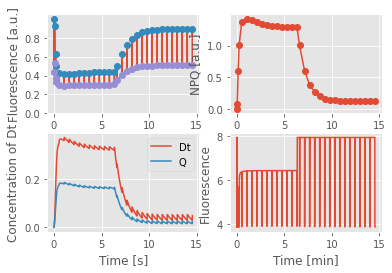

In [17]:
PAM1 = functions.changingLight(m, y0d, PFD=200., dim =0.)
F = PAM1.get_variable('Fluo')
Fm, NPQ, tm, Fo, to = get_NPQ.get_NPQ(PAM1.get_variable('Fluo'), PAM1.get_time(), PAM1.get_variable('L'), 5000)


plt.figure()
plt.title('Results for HL->LL:')

ax1=plt.subplot(221)
plt.plot(PAM1.get_time()/60., F/max(F))
plt.plot(tm/60.,Fm[0:]/max(F),'o')
plt.plot(to/60.,Fo/max(F),'o')
plt.ylim(0, 1.05)
plt.yticks(np.arange(0, 1, step=0.2))
plt.xlabel('Time [s]')
plt.ylabel('Fluorescence [a.u.]')

plt.subplot(222, sharex=ax1)
plt.plot(tm/60.,NPQ,'o-')
plt.xlabel('Time [s]')
plt.ylabel('NPQ [a.u.]')

fig3 = plt.subplot(223)
plt.plot(PAM1.get_time()/60., PAM1.get_variable('Dt'), label='Dt')
plt.plot(PAM1.get_time()/60., PAM1.get_variable('Q'), label ='Q')
plt.xlabel('Time [s]')
plt.ylabel('Concentration of Dt')
plt.legend()

plt.subplot(224, sharex=fig3)
plt.plot(PAM1.get_time()/60., PAM1.get_variable('pH'))
plt.xlabel('Time [s]')
plt.ylabel('pH')
plt.xlabel('Time [min]')
plt.ylabel('Fluorescence')